# Feature Selection-Filter Statistical Methods

<b> mutual information-MI (information gain): </b>

if X and y are independent(X does not give info about y), MI score is 0

if X determines the value of y, MI score differs

the smaller the value the less information the feature has about the target

<b> fisher score(chi square):  </b>


<b> univariate approaches:  </b>


<b> univariate roc-auc:  </b>



## Mutual information-MI (information gain):

## Classification -Paribas Claim Dataset

In [28]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [15]:
dataset = pd.read_csv('D:/ShakthiSai -Keerthana Learnings/AI and Machine Learning/Feature Engineering/bnp-paribas-cardif-claims-management/BNP Paribas Cardif Claims Management-train.csv',nrows=30000)
dataset.shape

(30000, 133)

In [16]:
dataset.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [17]:
# In practice, feature selection should be done after data pre-processing,
# so ideally, all the categorical variables are encoded into numbers,
# and then you can assess how deterministic they are of the target

# here for simplicity I will use only numerical variables
# select numerical columns:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(dataset.select_dtypes(include=numerics).columns)
dataset = dataset[numerical_vars]
dataset.shape

(30000, 114)

In [18]:
X=dataset.drop(labels=['target', 'ID'], axis=1)
y=dataset['target']

In [19]:
X

,v1,v2,v4,v5,v6,v7,v8,v9,v10,v11,...,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
0,1.335739,8.727474,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,0.503281,16.434108,...,0.803572,8.000000,1.989780,3.575369e-02,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,NaN,NaN,NaN,9.191265,NaN,NaN,2.301630,NaN,1.312910,NaN,...,NaN,NaN,NaN,5.988956e-01,NaN,NaN,1.957825,0,NaN,NaN
2,0.943877,5.310079,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,0.765864,14.756098,...,2.238806,9.333333,2.477596,1.345191e-02,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,0.797415,8.304757,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,6.542669,16.347483,...,1.956521,7.018256,1.812795,2.267384e-03,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.050328,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.948717,10.889794,4.926397,4.572967,1.989743,2.297437,0.088438,10.660378,2.866522,15.405405,...,3.004115,7.452830,3.038119,-7.937384e-07,2.105940,5.519230,0.936419,2,1.999999,0.892856
29996,1.907216,4.867047,3.857922,9.885675,2.749141,2.783504,0.096759,8.262295,1.006565,15.608418,...,2.932098,5.770491,2.499646,1.629838e-02,2.006661,1.981315,1.819473,1,1.790124,1.655173
29997,0.973684,10.073488,5.115219,8.836583,2.631578,2.842105,0.016717,9.756097,1.312909,15.520833,...,1.708861,8.292683,1.744367,4.598516e-03,1.429470,3.256579,2.609041,0,1.037038,1.428571
29998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.050329,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


In [20]:
y

0        1
1        1
2        1
3        1
4        1
        ..
29995    1
29996    1
29997    0
29998    1
29999    1
Name: target, Length: 30000, dtype: int64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((21000, 112), (9000, 112))

In [22]:
 # calculate the mutual information between the variables and the target
# this returns the mutual information value of each feature
# the smaller the value the less information the feature has about the target
mi = mutual_info_classif(X_train.fillna(0), y_train)
mi

array([7.05533940e-03, 3.90657133e-03, 4.96229513e-03, 4.53048924e-03,
       2.83928901e-03, 7.15355408e-03, 1.20619909e-02, 6.82970436e-03,
       2.98639398e-02, 0.00000000e+00, 1.45645357e-02, 6.08515565e-03,
       2.05119898e-02, 6.82639191e-03, 8.60956218e-04, 9.46663429e-03,
       4.36158844e-03, 5.07750510e-03, 0.00000000e+00, 1.41541199e-02,
       2.88098708e-03, 2.85133460e-03, 6.53957437e-03, 5.65834255e-03,
       8.71248084e-04, 6.67364762e-03, 0.00000000e+00, 4.24794449e-03,
       3.89026316e-03, 7.39748103e-03, 1.04897669e-02, 0.00000000e+00,
       6.99055924e-03, 5.90524578e-03, 1.89858083e-04, 3.40495018e-03,
       0.00000000e+00, 5.38085121e-03, 2.78787830e-03, 4.87471615e-03,
       2.32917492e-03, 6.34042325e-03, 8.14087461e-03, 4.25221779e-02,
       4.63134339e-03, 5.45413327e-03, 4.35031927e-03, 3.51190596e-03,
       6.20228571e-03, 5.69807352e-03, 1.60844648e-03, 8.10106864e-03,
       5.79839122e-03, 1.46148840e-02, 6.33661087e-03, 8.81061907e-03,
      

In [23]:
# let's add the variable names and order the features
# according to the MI for clearer visualisation
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False)

v50     0.042522
v10     0.029864
v14     0.020512
v129    0.014740
v62     0.014615
          ...   
v20     0.000000
v32     0.000000
v118    0.000000
v37     0.000000
v42     0.000000
Length: 112, dtype: float64

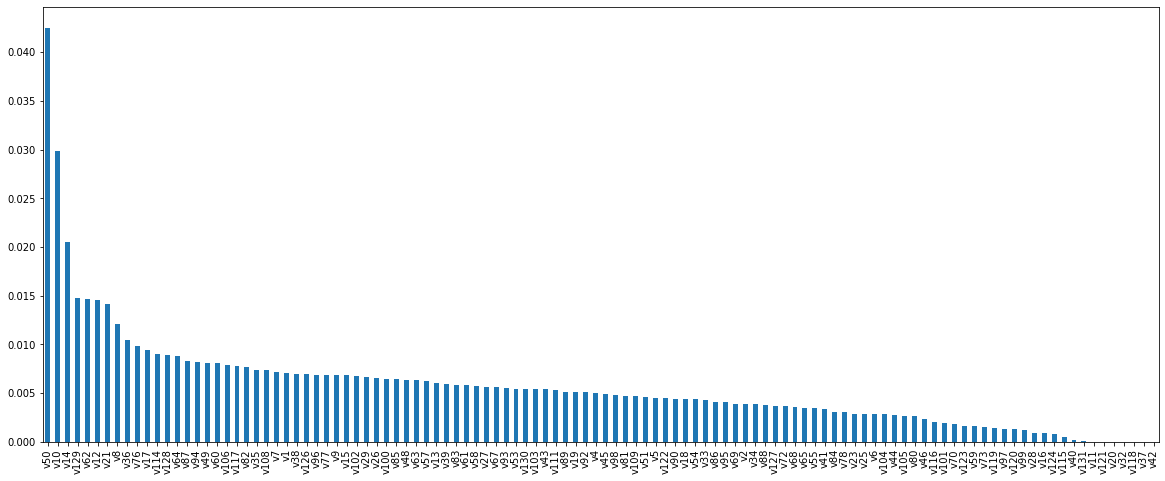

In [24]:
# and now let's plot the ordered MI values per feature
mi.sort_values(ascending=False).plot.bar(figsize=(20, 8))

few features (left of the plot) contribute the most to predicting the target.There are also a few features with almost zero MI values on the right of the plot.

choose a certain value of MI after studying the plot above. An alternative and most frequent way of selecting features is to select the top 10, or top 20 features, or the features in the the top 10th percentile of the MI value distribution.

To do this, you can use mutual info in combination with SelectKBest or SelectPercentile from sklearn. 

SelectKBest allows you to determine how many features, and SelectPercentile the features within a certain percentile. 

In [27]:

# select the top 10 features
best = SelectKBest(mutual_info_classif, k=10).fit(X_train.fillna(0), y_train)


In [26]:
# top 10 features

X_train.columns[best.get_support()]

Index(['v7', 'v8', 'v10', 'v12', 'v14', 'v21', 'v50', 'v61', 'v62', 'v129'], dtype='object')

## Mutual information-MI (information gain):

## Regression

In [29]:
data = pd.read_csv('D:/ShakthiSai -Keerthana Learnings/AI and Machine Learning/Feature Engineering/house_loan.csv')
data.shape

(1460, 81)

In [30]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [43]:
X=data.drop(labels=['SalePrice'], axis=1)
y=data['SalePrice']

In [44]:
X.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [45]:
y


0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [46]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(1460, 38)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 37), (438, 37))

In [48]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [50]:
# determine the mutual information
mi = mutual_info_regression(X_train.fillna(0), y_train)

In [51]:
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False)

OverallQual      0.543633
GrLivArea        0.479519
TotalBsmtSF      0.383477
GarageCars       0.374397
GarageArea       0.368032
YearBuilt        0.340302
1stFlrSF         0.312975
GarageYrBlt      0.272294
FullBath         0.266746
MSSubClass       0.250587
YearRemodAdd     0.250142
2ndFlrSF         0.231902
LotFrontage      0.210021
Fireplaces       0.181688
TotRmsAbvGrd     0.180354
OpenPorchSF      0.176771
LotArea          0.165308
BsmtFinSF1       0.160182
BsmtUnfSF        0.112556
OverallCond      0.102518
MasVnrArea       0.097894
HalfBath         0.082722
WoodDeckSF       0.074845
BedroomAbvGr     0.056081
BsmtFullBath     0.029966
ScreenPorch      0.024531
KitchenAbvGr     0.015611
BsmtFinSF2       0.011064
YrSold           0.008321
EnclosedPorch    0.007663
LowQualFinSF     0.004211
BsmtHalfBath     0.000000
MoSold           0.000000
3SsnPorch        0.000000
PoolArea         0.000000
MiscVal          0.000000
Id               0.000000
dtype: float64

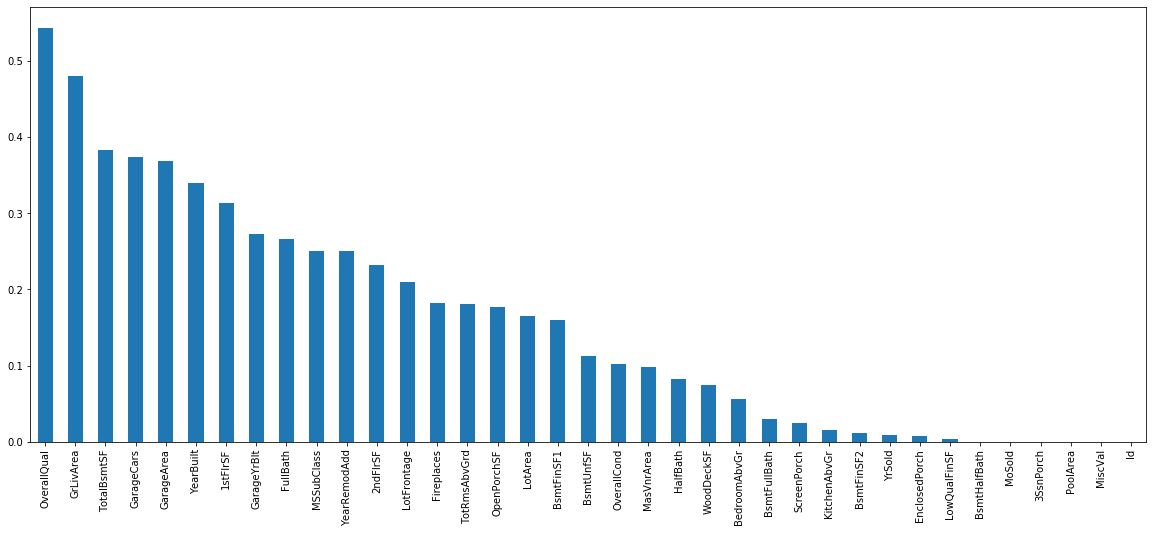

In [52]:
mi.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [53]:
## select the top 10 percentile
top10= SelectPercentile(mutual_info_regression, percentile=10).fit(X_train.fillna(0), y_train)
X_train.columns[top10.get_support()]

Index(['OverallQual', 'TotalBsmtSF', 'GrLivArea', 'GarageArea'], dtype='object')

## Fisher score(chi square): Titanic Dataset

suited for categorical variables

target should be binary

It compares the observed distribution of the different classes of target Y among the different categories of the feature, against the expected distribution of the target classes, regardless of the feature categories.

In [54]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [55]:
data1 = pd.read_csv('D:/ShakthiSai -Keerthana Learnings/AI and Machine Learning/Feature Engineering/titanic_train.csv')
data1.shape

(891, 12)

In [56]:
data1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
data1['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [60]:
# the categorical variables in the titanic are PClass, Sex and Embarked
#  encode the labels of the categories into numbers

# for Sex / Gender
data1['Sex'] = np.where(data1.Sex == 'male', 1, 0)

# for Embarked
ordinal_label = {k: i for i, k in enumerate(data1['Embarked'].unique(), 0)}
data1['Embarked'] = data1['Embarked'].map(ordinal_label)

# PClass is already ordinal

C:\Users\Vikee\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [61]:
data1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


In [63]:
X=data1[['Pclass', 'Sex', 'Embarked']]
y=data1['Survived']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((623, 3), (268, 3))

In [65]:
# calculate the chi2 p_value between each of the variables and the target
# it returns 2 arrays, one contains the F-Scores which are then 
# evaluated against the chi2 distribution to obtain the pvalue
# the pvalues are in the second array, see below

f_score = chi2(X_train.fillna(0), y_train)
f_score

(array([21.61080949,         nan, 11.83961845]),
 array([3.33964360e-06,            nan, 5.79837058e-04]))

In [66]:
# let's add the variable names and order it for clearer visualisation

pvalues = pd.Series(f_score[1])
pvalues.index = X_train.columns
pvalues.sort_values(ascending=False)

Embarked    0.000580
Pclass      0.000003
Sex              NaN
dtype: float64

in contrarily to MI, where we were interested in the higher MI values, for Fisher score, the smaller the p_value, the more significant the feature is to predict the target, in this case Survival in the titanic.


Note One thing to keep in mind when using Fisher score or univariate selection methods, is that in very big datasets, most of the features will show a small p_value, and therefore look like they are highly predictive. This is in fact an effect of the sample size. So care should be taken when selecting features using these procedures. An ultra tiny p_value does not highlight an ultra-important feature, it rather indicates that the dataset contains too many samples.

## Univariate approaches

Univariate feature selection works by selecting the best features based on univariate statistical tests (ANOVA). The methods based on F-test estimate the degree of linear dependency between two random variables. They assume a linear relationship between the feature and the target. These methods also assume that the variables follow a Gaussian distribution.

These may not always be the case for the variables in your dataset, so if looking to implement these procedure, you will need to corroborate these assumptions.

## Univariate approaches -Classification -Paribas Claim Dataset

In [77]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import f_classif, f_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [69]:
df1 = pd.read_csv('D:/ShakthiSai -Keerthana Learnings/AI and Machine Learning/Feature Engineering/bnp-paribas-cardif-claims-management/BNP Paribas Cardif Claims Management-train.csv',nrows=30000)
df1.shape

(30000, 133)

In [70]:
df1.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [71]:
# In practice, feature selection should be done after data pre-processing,
# so ideally, all the categorical variables are encoded into numbers,
# and then you can assess how deterministic they are of the target

# here for simplicity I will use only numerical variables
# select numerical columns:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(df1.select_dtypes(include=numerics).columns)
df1= df1[numerical_vars]
df1.shape

(30000, 114)

In [73]:
X=df1.drop(labels=['target', 'ID'], axis=1)
y=df1['target']

In [74]:
X.columns

Index(['v1', 'v2', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11',
       ...
       'v121', 'v122', 'v123', 'v124', 'v126', 'v127', 'v128', 'v129', 'v130',
       'v131'],
      dtype='object', length=112)

In [75]:
y

0        1
1        1
2        1
3        1
4        1
        ..
29995    1
29996    1
29997    0
29998    1
29999    1
Name: target, Length: 30000, dtype: int64

In [79]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((21000, 112), (9000, 112))

In [80]:
# calculate the univariate statistical measure between
# each of the variables and the target
# similarly to chi2, the output is the array of f-scores
# and an array of pvalues, which are the ones we will compare

univariate = f_classif(X_train.fillna(0), y_train)
univariate

(array([1.80232921e+01, 2.88916537e+00, 3.06013814e+00, 1.08039984e+01,
        5.24588699e+00, 7.52069520e+00, 7.33312642e+00, 1.54903190e+01,
        5.45549502e+02, 1.73414491e+01, 7.41589480e+01, 2.01846322e+01,
        3.64070750e+02, 1.90790085e+01, 1.44292799e+01, 9.31420371e-01,
        4.56536563e+00, 2.23499021e+01, 1.49530871e+01, 5.20875170e+01,
        1.69760061e+01, 9.51508797e+00, 7.05592098e+00, 7.80890470e+00,
        1.96870982e+01, 1.11919517e+01, 1.79876551e+01, 3.50446140e+01,
        1.96294446e+02, 1.56223720e+01, 2.39307155e+01, 2.67797301e+01,
        8.04447718e+01, 1.22103609e+00, 1.92680444e+01, 1.43627412e+01,
        1.60679328e+01, 7.85690835e+00, 8.31150987e+00, 2.14536739e+01,
        9.30108011e+00, 2.70928726e+01, 1.65261302e+01, 1.35054300e+03,
        3.28814169e+01, 1.75964358e+01, 9.08899554e+00, 3.78223254e+01,
        1.17741268e+01, 2.77227348e+01, 8.19193884e+00, 5.51644116e+00,
        9.78448049e+00, 2.06534371e+02, 9.49887602e+00, 1.800284

In [81]:
# let's add the variable names and order it for clearer visualisation
univariate = pd.Series(univariate[1])
univariate.index = X_train.columns
univariate.sort_values(ascending=False, inplace=True)

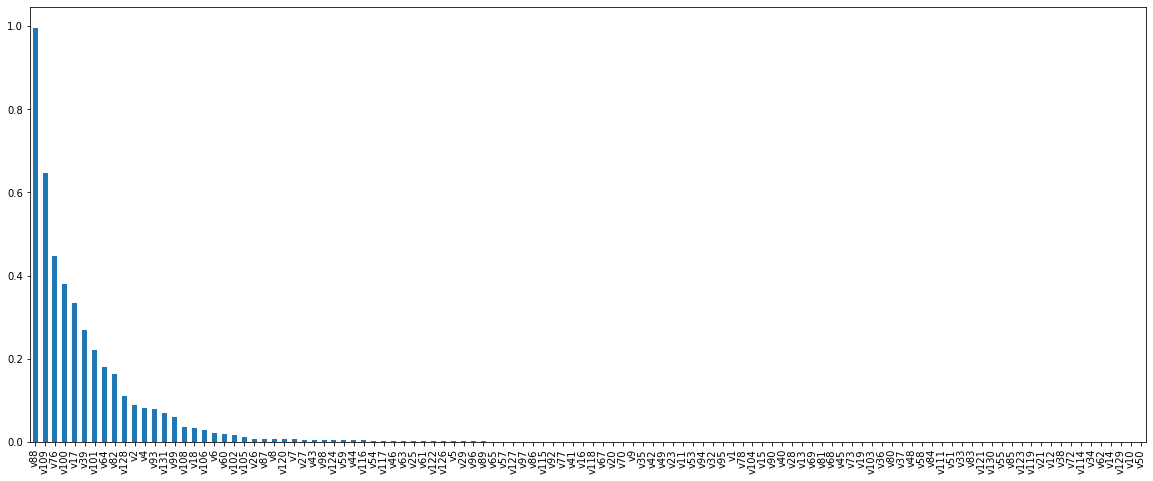

In [82]:
# and now let's plot the p values
univariate.sort_values(ascending=False).plot.bar(figsize=(20, 8))

the lower the p_value, the most predictive the feature is in principle. There are a few features that do not seem to have predictive power according to this tests, which are those on the left with pvalues above 0.05. Given that typically in statistics one uses a pvalue of 0.05 as a cut-off, I am inclined to believe that those features with pvalue > 0.05 are indeed not important. However, keep in mind that this test assumes a linear relationship, so it might also be the case that the feature is related to the target but not in a linear manner.

Further investigation is needed if we want to know the true nature of the relationship between feature and target.

in big datasets it is not unusual that the pvalues of the different features are really small. This does not say as much about the relevance of the feature. Mostly it indicates that it is a big the dataset.

Once again, where we put the cut-off to select features is a bit arbitrary. One way is to select the top 10, 20 features. Alternatively, the top 10th percentile. For this, you can use anova in combination with SelectKBest or SelectPercentile from sklearn.

In [83]:
# here I will select the top 10 features
sel_ = SelectKBest(f_classif, k=10).fit(X_train.fillna(0), y_train)
X_train.columns[sel_.get_support()]

Index(['v10', 'v12', 'v14', 'v34', 'v38', 'v50', 'v62', 'v72', 'v114', 'v129'], dtype='object')

In [84]:
X_train = sel_.transform(X_train.fillna(0))
X_train.shape

(21000, 10)

## Univariate approaches -Regression-House Price Prediction Dataset

In [86]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import f_classif, f_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [88]:
df2 = pd.read_csv('D:/ShakthiSai -Keerthana Learnings/AI and Machine Learning/Feature Engineering/house_loan.csv')
df2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [90]:
df2.shape

(1460, 81)

In [91]:
# In practice, feature selection should be done after data pre-processing,
# so ideally, all the categorical variables are encoded into numbers,
# and then you can assess how deterministic they are of the target

# here for simplicity I will use only numerical variables
# select numerical columns:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(df2.select_dtypes(include=numerics).columns)
df2 = df2[numerical_vars]
df2.shape

(1460, 38)

In [92]:
X=df2.drop(labels=['SalePrice'], axis=1)
y=df2['SalePrice']

In [93]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 37), (438, 37))

In [94]:
univariatereg = f_regression(X_train.fillna(0), y_train)
univariatereg = pd.Series(univariatereg[1])
univariatereg.index = X_train.columns
univariatereg.sort_values(ascending=False, inplace=True)

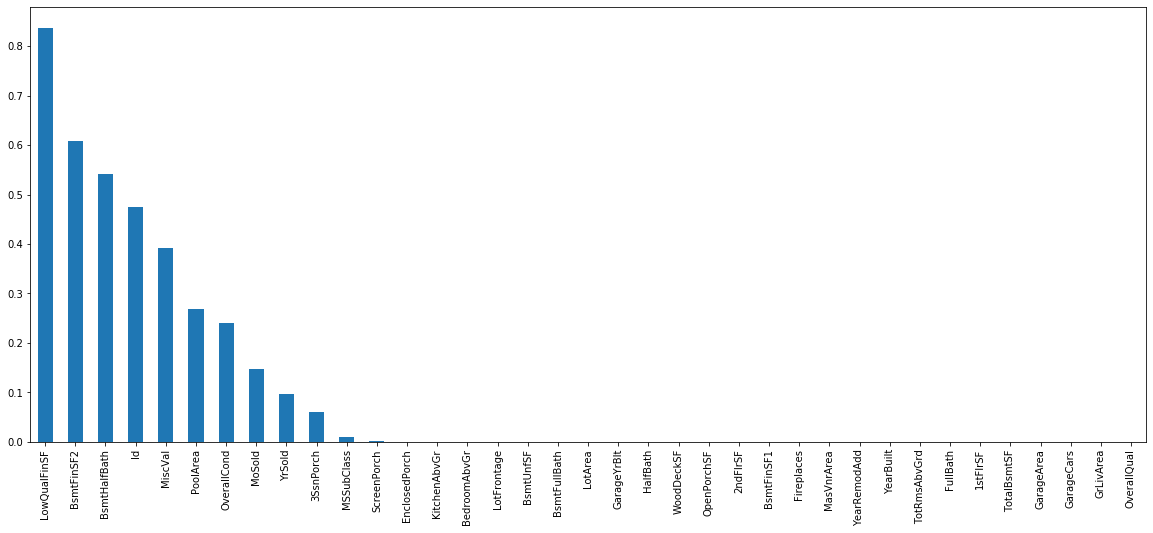

In [95]:
univariatereg.sort_values(ascending=False).plot.bar(figsize=(20,8))

Here again, there seem to be a bunch of features towards the left with pvalues above 0.05, which are candidates to be removed, as this means that the features do not statistically significantly discriminate the target.

In [96]:
# here I will select the top 10 percentile
top10 = SelectPercentile(f_regression, percentile=10).fit(X_train.fillna(0), y_train)
X_train.columns[top10.get_support()]

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea'], dtype='object')

In [97]:
X_train = top10.transform(X_train.fillna(0))
X_train.shape

(1022, 4)

## Univariate roc-auc


This procedure works as follows:

- First, it builds one decision tree per feature, to predict the target
- Second, it makes predictions using the decision tree and the mentioned feature
- Third, it ranks the features according to the machine learning metric (roc-auc or mse)
- It selects the highest ranked features

In [98]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import roc_auc_score, mean_squared_error

## Univariate roc-auc -Classification

In [100]:
dataset2 = pd.read_csv('D:/ShakthiSai -Keerthana Learnings/AI and Machine Learning/Feature Engineering/bnp-paribas-cardif-claims-management/BNP Paribas Cardif Claims Management-train.csv',nrows=30000)
dataset2.shape

(30000, 133)

In [101]:
dataset2.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [102]:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(dataset2.select_dtypes(include=numerics).columns)
dataset2 = dataset2[numerical_vars]
dataset2.shape

(30000, 114)

In [103]:
dataset2.head()

,ID,target,v1,v2,v4,v5,v6,v7,v8,v9,...,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,...,0.803572,8.000000,1.989780,0.035754,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,NaN,9.191265,NaN,NaN,2.301630,NaN,...,NaN,NaN,NaN,0.598896,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,...,2.238806,9.333333,2.477596,0.013452,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,...,1.956521,7.018256,1.812795,0.002267,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


In [104]:
X=dataset2.drop(labels=['target', 'ID'], axis=1)
y=dataset2['target']

In [105]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
X,y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((21000, 112), (9000, 112))

In [107]:
# loop to build a tree, make predictions and get the roc-auc
# for each feature of the train set


roc_values = []
for feature in X_train.columns:
    clf = DecisionTreeClassifier()
    clf.fit(X_train[feature].fillna(0).to_frame(), y_train)
    y_scored = clf.predict_proba(X_test[feature].fillna(0).to_frame())
    roc_values.append(roc_auc_score(y_test, y_scored[:, 1]))

In [108]:
# let's add the variable names and order it for clearer visualisation
roc_values = pd.Series(roc_values)
roc_values.index = X_train.columns
roc_values.sort_values(ascending=False)

v10     0.612116
v14     0.578280
v129    0.577103
v50     0.566539
v62     0.563280
          ...   
v29     0.494941
v102    0.493964
v119    0.492806
v37     0.492382
v84     0.490563
Length: 112, dtype: float64

In [109]:
len(roc_values[roc_values > 0.5])

84

84 of 112  features show a predictive performance higher than 0.5. This means that we could remove 28 features from this dataset using this method.

for regression use, DecisionTreeRegressor()